# 使用PCA去噪

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [3]:
digits = datasets.load_digits()

In [4]:
from sklearn.decomposition import PCA

In [12]:
def plot_digits(digits):
    fig, axes = plt.subplots(10, 10,
                    figsize=(16,16),
                    subplot_kw={'xticks': [], 'yticks': []},
                    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(digits[i].reshape(8, 8),
               cmap="binary",
               interpolation='nearest',
               clim=(0, 16))
    plt.show()

In [9]:
example_digits = np.empty((100, digits.data.shape[1]))
for k in range(0, 10):
    example_digits[10*k:10*k+10] = digits.data[digits.target==k][:10]

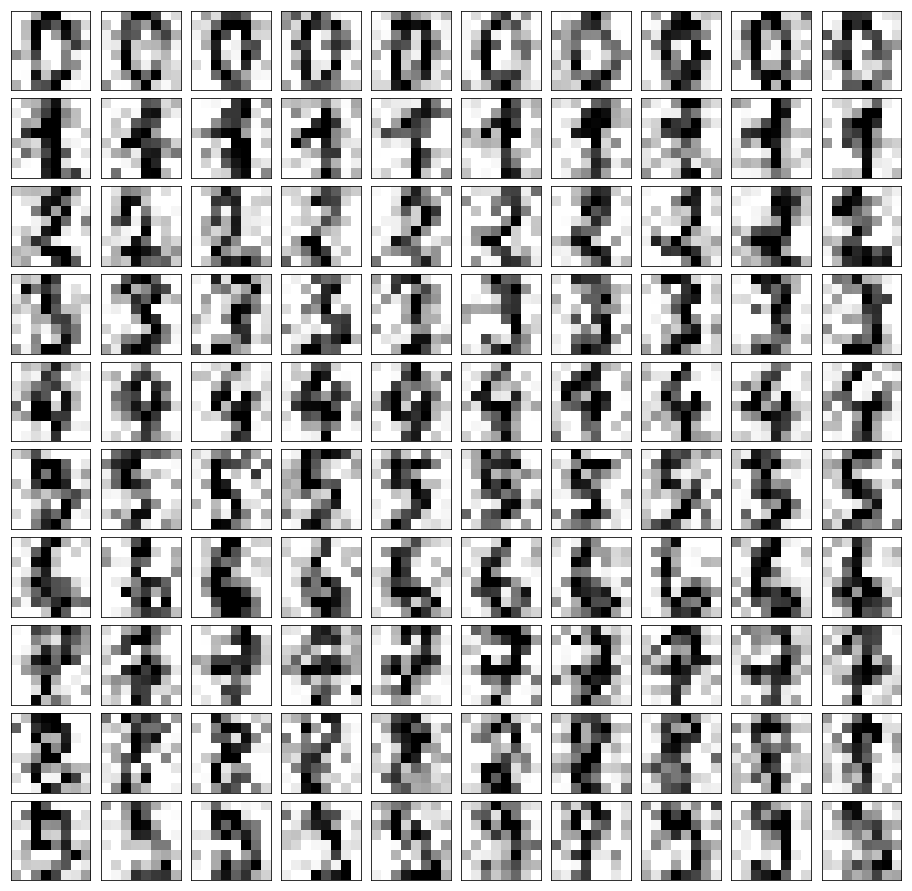

In [14]:
noisy_digits = example_digits + np.random.normal(0, 4, example_digits.shape)
plot_digits(noisy_digits)

In [15]:
pca = PCA(0.5).fit(noisy_digits)
pca.n_components_

8

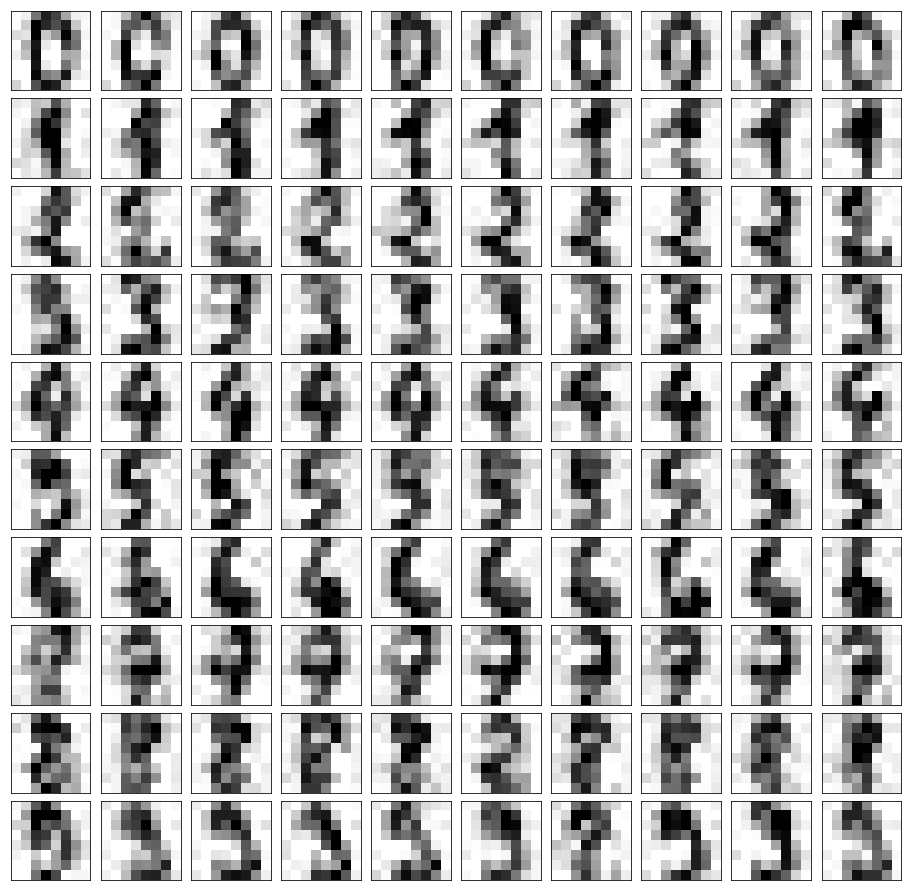

In [16]:
components = pca.transform(noisy_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)